**FINC565 Time Series Modeling Project**

**Forecasting Tourist Arrivals in Italy**

**Eris Corbaxhi**

In [38]:
# We start with uploading our dataset

from google.colab import files
uploaded = files.upload()

Saving Turismo_TS_1997-2024.xlsx to Turismo_TS_1997-2024 (1).xlsx


In [39]:
# Then we import all our needed libraries

import pandas as pd
import matplotlib.pyplot as plt
import json
import urllib.request
import plotly.express as pxt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import statsmodels.api as sm
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.express as px

**Exploring the data**

In [40]:
# We start exploring the data to better understand the data and see any pattern and create an idea of the most important variables and where to focus

# Load the Excel file
file_path = 'Turismo_TS_1997-2024.xlsx'
xls = pd.ExcelFile(file_path)

# View available sheet names
print("Available sheets:", xls.sheet_names)

# Load the relevant sheet (Foreign visitors)
df = xls.parse('TS1-V-S')

# Show the first 5 rows
df.head()

Available sheets: ['Indice', 'TS1-S-S', 'TS1-V-S', 'TS1-N-S', 'TS1-S-I', 'TS1-V-I', 'TS1-N-I', 'TS2-S-S', 'TS2-V-S', 'TS2-N-S', 'TS2-S-I', 'TS2-V-I', 'TS2-N-I', 'TS3-S-S', 'TS3-V-S', 'TS3-N-S', 'TS3-S-I', 'TS3-V-I', 'TS3-N-I', 'TS4-S-S', 'TS4-V-S', 'TS4-N-S', 'TS4-S-I', 'TS4-V-I', 'TS4-N-I']


VIAGGIATORI STRANIERI -VIAGGIATORI ALLA FRONTIERA PER PAESE DI ORIGINE  \
0  FOREIGN TRAVELLERS - TRAVELLERS AT THE BORDER ...                       
1                                         (migliaia)                       
2                                        (thousands)                       
3                                                NaN                       
4                                                NaN                       

  Unnamed: 1 Unnamed: 2   Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0        NaN        NaN          NaN        NaN        NaN        NaN   
1        NaN        NaN          NaN        NaN        NaN        NaN   
2        NaN        NaN          NaN        NaN        NaN        NaN   
3        NaN        NaN          NaN        NaN        NaN        NaN   
4        NaN        NaN  Europa - UE        NaN        NaN        NaN   

  Unnamed: 7         Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11  \
0        NaN                NaN        NaN         NaN         NaN   
1        NaN                NaN        NaN         NaN         NaN   
2        NaN                NaN        NaN         NaN         NaN   
3        NaN                NaN        NaN         NaN         NaN   
4        NaN  Europa - Extra UE        NaN         NaN         NaN   

  Unnamed: 12 Unnamed: 13 Unnamed: 14 Unnamed: 15 Unnamed: 16 Unnamed: 17  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4     America         NaN         NaN      Africa        Asia         NaN   

  Unnamed: 18    Unnamed: 19  
0         NaN            NaN  
1         NaN   Tav. TS1-V-S  
2         NaN  Table TS1-V-S  
3         NaN            NaN  
4     Oceania         Totale

In [41]:
# Graph of Top 5 Tourist Source Countries Visiting Italy (1997–2024)
# Having an idea of where the toruists come from

In [42]:
# List sheets
xls = pd.ExcelFile(file_path)
print("Sheets:", xls.sheet_names)

# To check the specific one “TS2‑V‑S”
df_specific = xls.parse("TS2-V-S")
print(f"Rows: {df_specific.shape[0]}, Columns: {df_specific.shape[1]}")

Sheets: ['Indice', 'TS1-S-S', 'TS1-V-S', 'TS1-N-S', 'TS1-S-I', 'TS1-V-I', 'TS1-N-I', 'TS2-S-S', 'TS2-V-S', 'TS2-N-S', 'TS2-S-I', 'TS2-V-I', 'TS2-N-I', 'TS3-S-S', 'TS3-V-S', 'TS3-N-S', 'TS3-S-I', 'TS3-V-I', 'TS3-N-I', 'TS4-S-S', 'TS4-V-S', 'TS4-N-S', 'TS4-S-I', 'TS4-V-I', 'TS4-N-I']
Rows: 122, Columns: 29


In [43]:
 # Let's load the relevant sheet and skip header rows
df = pd.read_excel("Turismo_TS_1997-2024.xlsx", sheet_name="TS1-V-S", skiprows=6)

# We start cleaning the data

# Drop empty rows and columns
df = df.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Rename the first column to "Year"
df.rename(columns={df.columns[0]: "Year"}, inplace=True)

# Keep only rows where "Year" is a number (drop text and NaN)
df = df[pd.to_numeric(df["Year"], errors="coerce").notnull()]
df["Year"] = df["Year"].astype(int)

# Convert all nationality columns to numeric
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop any columns with "Total" or "Unnamed" in the name
clean_df = df.loc[:, ~df.columns.str.contains("Total|Unnamed", case=False)]

Top 5 individual countries: ['Europe - EU ', 'Europe-Extra EU', 'America', 'Asia', 'Oceania']


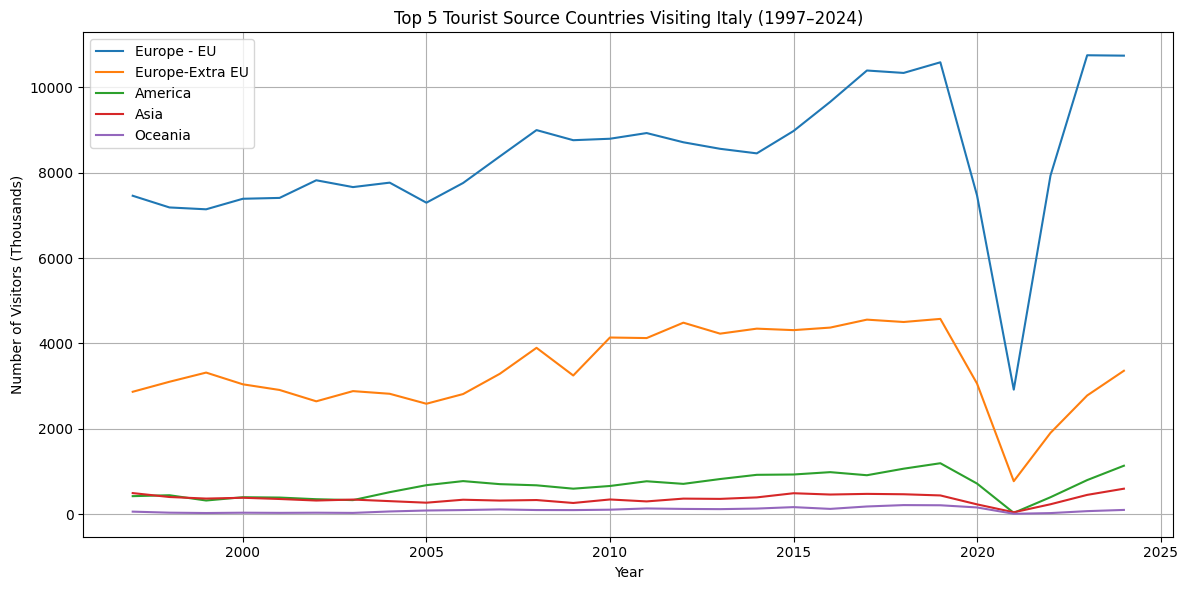

In [44]:
# Find top 5 countries by total tourists
totals_cleaned = clean_df.drop(columns=["Year"]).sum().sort_values(ascending=False)
top5_countries_clean = totals_cleaned.head(5).index.tolist()
print("Top 5 individual countries:", top5_countries_clean)

# Plot again with the cleaned list
plt.figure(figsize=(12, 6))
for country in top5_countries_clean:
    plt.plot(clean_df["Year"], clean_df[country], label=country)

plt.title("Top 5 Tourist Source Countries Visiting Italy (1997–2024)")
plt.xlabel("Year")
plt.ylabel("Number of Visitors (Thousands)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
# Histogram of Average Number of Tourists per Year by Italian Region (1997–2024)
# We start to go deeper in details

In [46]:
# We load and clean again the data
file_path = list(uploaded.keys())[0]
df_regions = pd.read_excel(file_path, sheet_name="TS2-V-S", skiprows=6)

# Drop empty rows/columns
df_regions = df_regions.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Set proper column headers and drop the first row used as header
df_regions.columns = df_regions.iloc[0]
df_regions = df_regions.drop(df_regions.index[0])
df_regions = df_regions.rename(columns={df_regions.columns[0]: "Year"})

# Convert Year to numeric and filter valid rows
df_regions = df_regions[pd.to_numeric(df_regions["Year"], errors="coerce").notnull()]
df_regions["Year"] = df_regions["Year"].astype(int)

# Step 4: Select and clean region columns
region_cols = [col for col in df_regions.columns if col != "Year" and isinstance(col, str)]
for col in region_cols:
    df_regions[col] = pd.to_numeric(df_regions[col], errors="coerce")

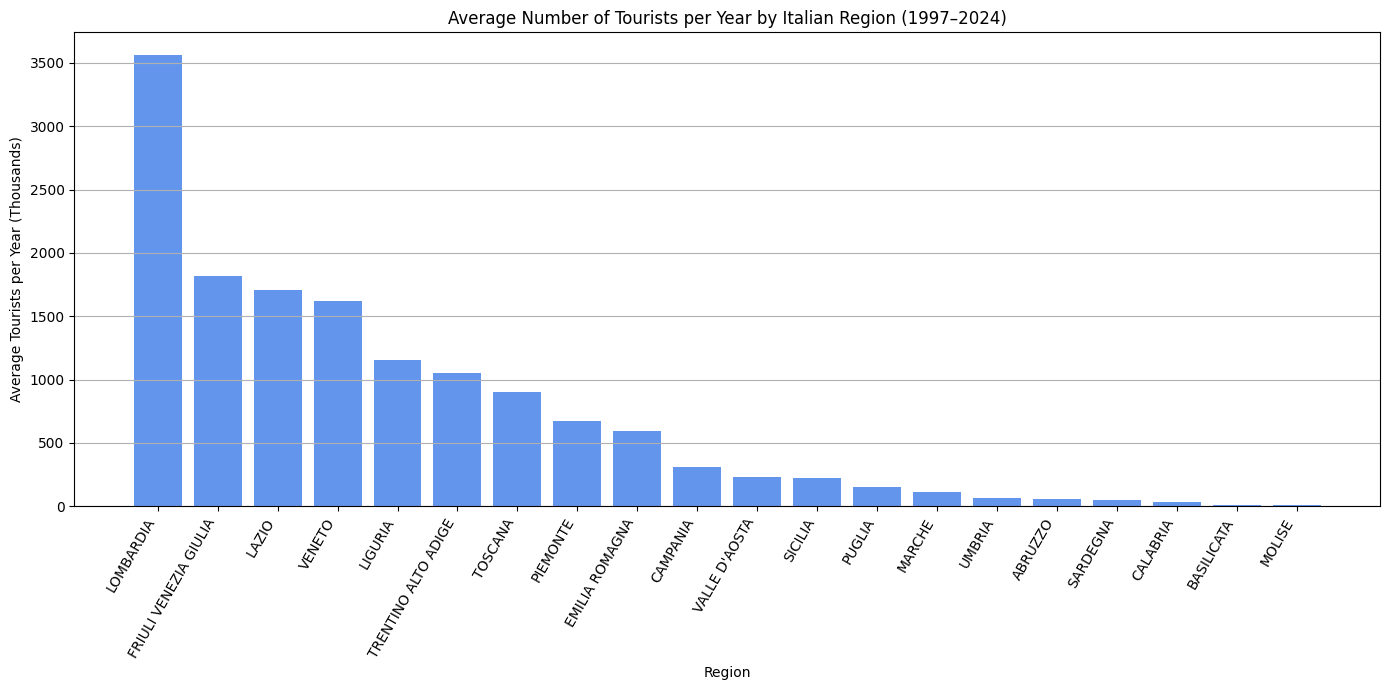

In [47]:
# Compute average (mean) per region
mean_tourists = df_regions[region_cols].mean().sort_values(ascending=False)

# Step Plot histogram Average Number of Tourists per Year by Italian Region (1997–2024)
plt.figure(figsize=(14, 7))
plt.bar(mean_tourists.index, mean_tourists.values, color='cornflowerblue')
plt.title("Average Number of Tourists per Year by Italian Region (1997–2024)")
plt.xlabel("Region")
plt.ylabel("Average Tourists per Year (Thousands)")
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [48]:
# Map of Italian Regions with Average Tourists Per Year Over 500,000 (1997–2024)
# To see where the toruists mostly concentrate. This is very helpful in efficient resourse location and investments

In [49]:
# Load regional tourism data
file_path = list(uploaded.keys())[0]
df_regions = pd.read_excel(file_path, sheet_name="TS2-V-S", skiprows=6)
df_regions = df_regions.dropna(how='all', axis=0).dropna(how='all', axis=1)
df_regions.columns = df_regions.iloc[0]
df_regions = df_regions.drop(df_regions.index[0])
df_regions = df_regions.rename(columns={df_regions.columns[0]: "Year"})
df_regions = df_regions[pd.to_numeric(df_regions["Year"], errors="coerce").notnull()]
df_regions["Year"] = df_regions["Year"].astype(int)

# Compute average (mean) tourists per year per region
region_cols = [col for col in df_regions.columns if col != "Year" and isinstance(col, str)]
for col in region_cols:
    df_regions[col] = pd.to_numeric(df_regions[col], errors="coerce")

average_tourists = df_regions[region_cols].mean()

In [50]:
# Create a DataFrame for mapping
tourism_data = pd.DataFrame({
    "region": average_tourists.index.str.strip().str.upper(),
    "average_tourists": average_tourists.values
})

# Map region names to match GeoJSON
name_mapping = {
    "PIEMONTE": "Piemonte",
    "VALLE D'AOSTA": "Valle d'Aosta/Vallée d'Aoste",
    "LOMBARDIA": "Lombardia",
    "TRENTINO ALTO ADIGE": "Trentino-Alto Adige/Südtirol",
    "VENETO": "Veneto",
    "FRIULI VENEZIA GIULIA": "Friuli-Venezia Giulia",
    "LIGURIA": "Liguria",
    "EMILIA ROMAGNA": "Emilia-Romagna",
    "TOSCANA": "Toscana",
    "UMBRIA": "Umbria",
    "MARCHE": "Marche",
    "LAZIO": "Lazio",
    "ABRUZZO": "Abruzzo",
    "MOLISE": "Molise",
    "CAMPANIA": "Campania",
    "PUGLIA": "Puglia",
    "BASILICATA": "Basilicata",
    "CALABRIA": "Calabria",
    "SICILIA": "Sicilia",
    "SARDEGNA": "Sardegna"
}
tourism_data["region"] = tourism_data["region"].map(name_mapping)

# Assign colors based on average threshold (500 = 500,000)
tourism_data["category"] = tourism_data["average_tourists"].apply(
    lambda x: "Over 500k/yr" if x >= 500 else "Under 500k/yr"
)

In [51]:
# Load Italian region GeoJSON
url = 'https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_regions.geojson'
with urllib.request.urlopen(url) as response:
    italy_regions = json.load(response)

# Plot the map
fig = px.choropleth(
    tourism_data,
    geojson=italy_regions,
    locations="region",
    featureidkey="properties.reg_name",
    color="category",
    color_discrete_map={
        "Over 500k/yr": "blue",
        "Under 500k/yr": "lightgray"
    },
    title="Italian Regions with Average Tourists Per Year Over 500,000 (1997–2024)"
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0}, coloraxis_showscale=False)
fig.show()

**Forecasting models**

In [35]:
# ARIMA (1,1,1)

In [15]:
# Preparing the file for the model ARIMA that needs a clean, continuous time series.

# Load file and inspect
file_path = list(uploaded.keys())[0]
df = pd.read_excel(file_path, sheet_name="TS1-V-S", skiprows=6)
df = df.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Manually reset column headers by checking row 10
df.columns = df.iloc[10]  # We try row 10 for meaningful headers
df = df.drop(df.index[:11])  # We drop top rows

# Rename year column
df = df.rename(columns={df.columns[0]: "Year"})

# Keep only valid year rows
df = df[pd.to_numeric(df["Year"], errors='coerce').notnull()]
df["Year"] = df["Year"].astype(int)

# Print columns now
print("Available columns after fixing:", df.columns.tolist())

Available columns after fixing: ['Year', '3° trim.', '3° quarter', np.float64(15389.076000000003), 5989.264, 3136.94, 2424.946, 434.821, np.float64(4468.513000000001), 681.396, 3426.835, 92.865, np.float64(751.097), 564.761, 74.024, np.float64(84.75300000000001), np.float64(427.785), 295.084, 70.539, np.float64(21191.763000000003)]


In [16]:
# Checking where the real data starts, so I can properly clean and structure the dataset before modeling

# Re-load the raw sheet with no header and show first rows
df_raw = pd.read_excel(file_path, sheet_name="TS1-V-S", header=None)

# Show the first 20 rows to identify the real header
pd.set_option('display.max_columns', None)  # show all columns
df_raw.head(20)

0         1           2   \
0   VIAGGIATORI STRANIERI -VIAGGIATORI ALLA FRONTI...       NaN         NaN   
1   FOREIGN TRAVELLERS - TRAVELLERS AT THE BORDER ...       NaN         NaN   
2                                          (migliaia)       NaN         NaN   
3                                         (thousands)       NaN         NaN   
4                                                 NaN       NaN         NaN   
5                                                 NaN       NaN         NaN   
6                                                 NaN       NaN         NaN   
7                                                 NaN       NaN         NaN   
8                                                 NaN       NaN         NaN   
9                                                 NaN       NaN         NaN   
10                                                NaN       NaN         NaN   
11                                               1997  1° trim.  1° quarter   
12                                                NaN  2° trim.  2° quarter   
13                                                NaN  3° trim.  3° quarter   
14                                                NaN  4° trim.  4° quarter   
15                                               1998  1° trim.  1° quarter   
16                                                NaN  2° trim.  2° quarter   
17                                                NaN  3° trim.  3° quarter   
18                                                NaN  4° trim.  4° quarter   
19                                               1999  1° trim.  1° quarter   

              3          4         5         6        7                  8   \
0            NaN        NaN       NaN       NaN      NaN                NaN   
1            NaN        NaN       NaN       NaN      NaN                NaN   
2            NaN        NaN       NaN       NaN      NaN                NaN   
3            NaN        NaN       NaN       NaN      NaN                NaN   
4            NaN        NaN       NaN       NaN      NaN                NaN   
5    Europa - UE        NaN       NaN       NaN      NaN  Europa - Extra UE   
6   Europe - EU         NaN       NaN       NaN      NaN    Europe-Extra EU   
7            NaN    di cui:       NaN       NaN      NaN                NaN   
8            NaN  of which:       NaN       NaN      NaN                NaN   
9            NaN   Germania   Francia   Austria   Spagna                NaN   
10           NaN    Germany    France   Austria    Spain                NaN   
11      7460.048   2367.656  1930.345  1125.328  140.904           2865.269   
12      11759.85   4718.026  2508.778  1882.453   244.04           3424.293   
13     15004.357   6017.069  3409.848  2243.737  356.098           3868.566   
14      7497.944   2714.893  1520.813  1305.916  184.151           2742.355   
15      7186.182    1953.66  1834.322  1361.189  249.981           3099.659   
16     11746.765   4280.679  2864.098  1885.722   338.38           3760.269   
17     15389.076   5989.264   3136.94  2424.946  434.821           4468.513   
18      7944.065   2902.447  1536.297  1222.898  225.913           3165.359   
19      7142.563   1822.111  2053.606  1232.844  139.557           3315.127   

                9            10      11       12             13       14  \
0              NaN          NaN     NaN      NaN            NaN      NaN   
1              NaN          NaN     NaN      NaN            NaN      NaN   
2              NaN          NaN     NaN      NaN            NaN      NaN   
3              NaN          NaN     NaN      NaN            NaN      NaN   
4              NaN          NaN     NaN      NaN            NaN      NaN   
5              NaN          NaN     NaN  America            NaN      NaN   
6              NaN          NaN     NaN  America            NaN      NaN   
7          di cui:          NaN     NaN      NaN        di cui:      NaN   
8        of which:          NaN     NaN      Na

In [17]:
# Column names must be clear and consistent

# Reload data from correct starting point
df = pd.read_excel(file_path, sheet_name="TS1-V-S", skiprows=10)

# Drop any fully empty rows or columns
df = df.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Rename the first column to "Year"
df = df.rename(columns={df.columns[0]: "Year"})

# Convert "Year" to numeric and drop invalids
df = df[pd.to_numeric(df["Year"], errors='coerce').notnull()]
df["Year"] = df["Year"].astype(int)

# Confirm what columns exist now
print("Columns available:", df.columns.tolist())

Columns available: ['Year', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Germany', 'France', 'Austria', 'Spain', 'Unnamed: 8', 'United Kingdom', 'Switzerland', 'Russia', 'Unnamed: 12', 'United States', 'Canada', 'Unnamed: 15', 'Unnamed: 16', 'Japan', 'Unnamed: 18', 'Unnamed: 19']


In [18]:
# Final touch of cleaning

# Filter country columns only
country_cols = [col for col in df.columns if col not in ["Year"] and not col.startswith("Unnamed")]

# Convert all to numeric
for col in country_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Sum across all countries to get total arrivals per year
df["total_arrivals"] = df[country_cols].sum(axis=1, skipna=True)

In [19]:
# Last check before the model

# Print the selected country columns
print("Country columns used:", country_cols)

# Check sample of the summed 'total_arrivals'
df["total_arrivals"] = df[country_cols].sum(axis=1, skipna=True)
print("Sample total arrivals:\n", df[["Year", "total_arrivals"]].head())

Country columns used: ['Germany', 'France', 'Austria', 'Spain', 'United Kingdom', 'Switzerland', 'Russia', 'United States', 'Canada', 'Japan']
Sample total arrivals:
     Year  total_arrivals
0   1997        8764.608
4   1998        8974.381
8   1999        8893.977
12  2000        8406.087
16  2001        8529.407


<ipython-input-20-4ed8c65d03cd>:8: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'YE' instead.



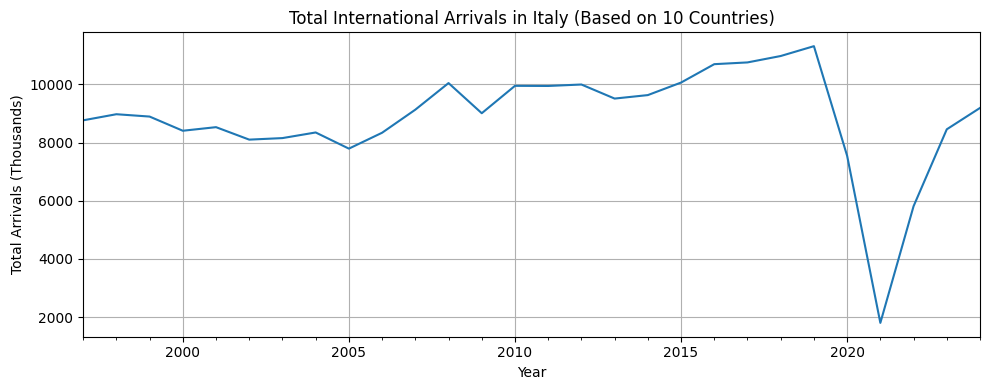

In [20]:
# Displays the trend of tourist arrivals over time (10 countries)

# Create and clean time series
ts = df.set_index("Year")["total_arrivals"]
ts_clean = ts.dropna()

# Set annual frequency (correct string: 'A')
ts_clean.index = pd.date_range(start=f"{ts_clean.index.min()}",
                               periods=len(ts_clean),
                               freq='A')

# Plot
plt.figure(figsize=(10, 4))
ts_clean.plot(title="Total International Arrivals in Italy (Based on 10 Countries)")
plt.xlabel("Year")
plt.ylabel("Total Arrivals (Thousands)")
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-21-87cb55c2b43b>:32: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'YE' instead.



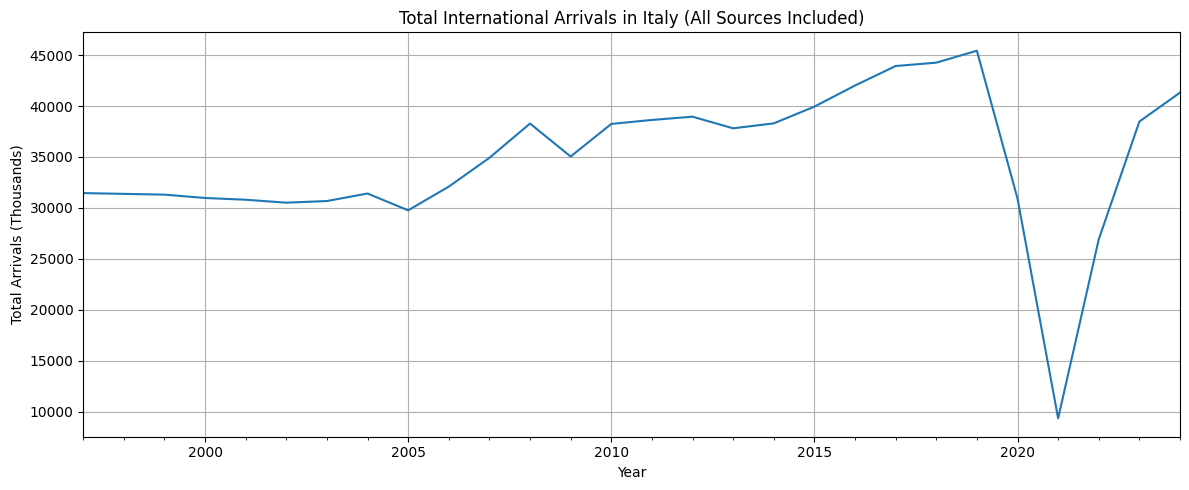

In [21]:
# Displays the trend of tourist arrivals over time (All countries)

# Load and clean the Excel sheet
file_path = list(uploaded.keys())[0]
df = pd.read_excel(file_path, sheet_name="TS1-V-S", skiprows=10)

# Step 4: Drop empty rows and columns
df = df.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Step 5: Rename the first column to "Year"
df = df.rename(columns={df.columns[0]: "Year"})

# Step 6: Keep only rows with valid year values
df = df[pd.to_numeric(df["Year"], errors='coerce').notnull()]
df["Year"] = df["Year"].astype(int)

# Step 7: Use all numeric columns except "Year" for total calculation
data_cols = [col for col in df.columns if col != "Year"]

# Step 8: Convert all data columns to numeric
for col in data_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 9: Sum across all valid columns to compute total arrivals
df["total_arrivals"] = df[data_cols].sum(axis=1, skipna=True)

# Step 10: Create a time series and drop missing values
ts = df.set_index("Year")["total_arrivals"]
ts_clean = ts.dropna()

# Step 11: Set index to yearly frequency
ts_clean.index = pd.date_range(start=f"{ts_clean.index.min()}", periods=len(ts_clean), freq='A')

# Step 12: Plot the final time series
plt.figure(figsize=(12, 5))
ts_clean.plot(title="Total International Arrivals in Italy (All Sources Included)")
plt.xlabel("Year")
plt.ylabel("Total Arrivals (Thousands)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# Fit ARIMA(1,1,1) on the full monthly series

#  ts_clean should be a pandas Series with a Monthly DateTimeIndex
model = ARIMA(ts_clean, order=(1, 1, 1))
fit = model.fit()

# Forecast the next 60 months (5 years)
n_steps = 5 * 12
forecast = fit.get_forecast(steps=n_steps)

In [23]:
# Build the forecast index continuing monthly
last_date = ts_clean.index[-1]
forecast_index = pd.date_range(
    start=last_date + pd.offsets.MonthEnd(1),
    periods=n_steps,
    freq="M"
)

# Extract mean and 95% CI
forecast_mean = forecast.predicted_mean.set_axis(forecast_index)
conf_int = forecast.conf_int(alpha=0.05)
conf_int.index = forecast_index

<ipython-input-23-f58392de0c8d>:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



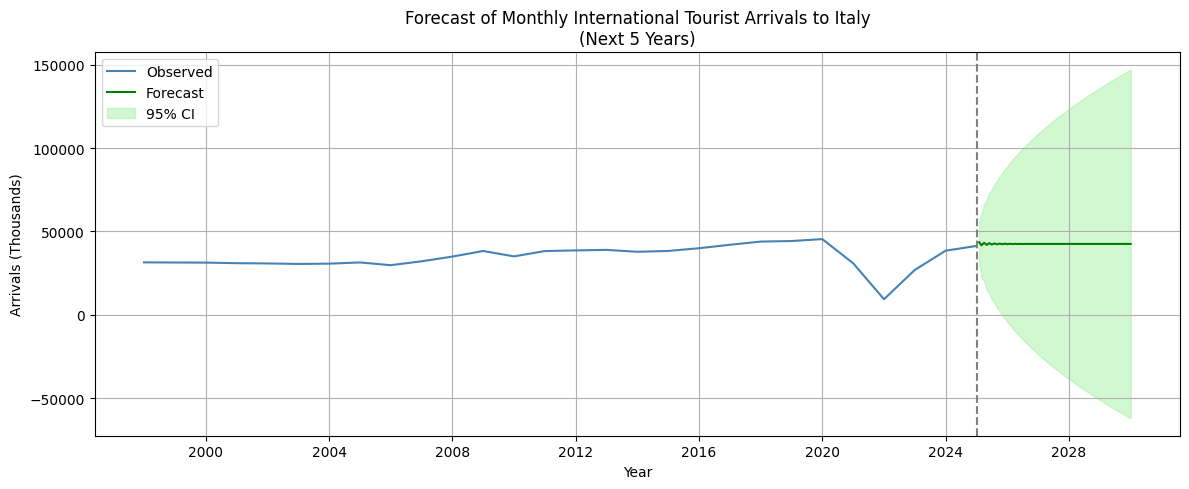

In [24]:
# To Obtain the Plot
plt.figure(figsize=(12, 5))
plt.plot(ts_clean, label='Observed', color='steelblue')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='green')
plt.fill_between(
    forecast_index,
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    color='lightgreen', alpha=0.4,
    label='95% CI'
)
plt.axvline(ts_clean.index[-1], color='gray', linestyle='--')  # separation line
plt.title("Forecast of Monthly International Tourist Arrivals to Italy\n(Next 5 Years)")
plt.xlabel("Year")
plt.ylabel("Arrivals (Thousands)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

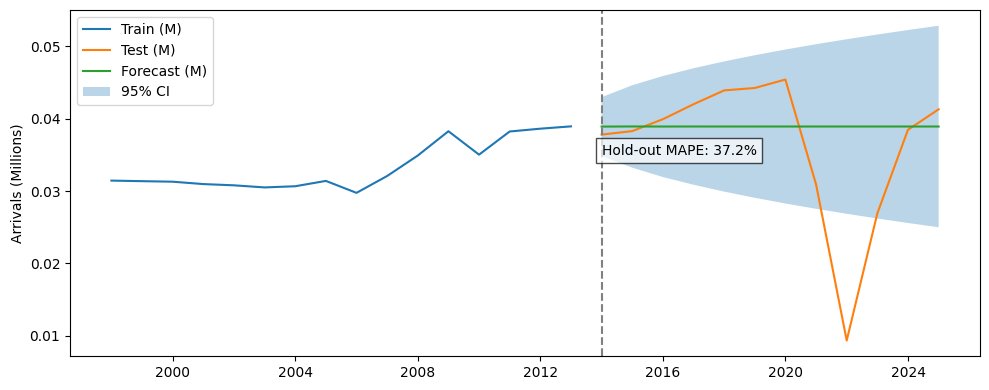

In [25]:
# Let's see how well an ARIMA model can forecast the next 12 months by training on past data, predicting ahead,
# comparing to actual values, and visualizing the results with error metrics.

horizon = 12
train = ts_clean.iloc[:-horizon]
test  = ts_clean.iloc[-horizon:]

# Fit ARIMA on the training data
model = ARIMA(train, order=(1,1,1))
fit   = model.fit()

# Forecast the hold‑out horizon
fc    = fit.get_forecast(steps=horizon)
y_pred = fc.predicted_mean
y_true = test  # the actual arrivals in those last 12 months

# Compute MAPE
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Now build the plot (scaling to millions for readability)
train_m = train / 1_000_000
test_m  = test  / 1_000_000
pred_m  = y_pred / 1_000_000
ci      = fc.conf_int() / 1_000_000
ci.index = pred_m.index

plt.figure(figsize=(10,4))
plt.plot(train_m, label="Train (M)")
plt.plot(test_m,  label="Test (M)")
plt.plot(pred_m,  label="Forecast (M)")
plt.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], alpha=0.3, label="95% CI")
plt.axvline(test.index[0], color="gray", linestyle="--")

# annotate MAPE
plt.text(test.index[0], train_m.max()*0.9,
         f"Hold‑out MAPE: {mape:.1f}%",
         bbox=dict(facecolor="white", alpha=0.7))
plt.ylabel("Arrivals (Millions)")
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
# ARIMA(2,1,0)


                               SARIMAX Results                                
Dep. Variable:         total_arrivals   No. Observations:                   28
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -274.365
Date:                Fri, 09 May 2025   AIC                            554.731
Time:                        22:04:28   BIC                            558.618
Sample:                    12-31-1997   HQIC                           555.887
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1022      0.089      1.145      0.252      -0.073       0.277
ar.L2         -0.2435      0.117     -2.084      0.037      -0.473      -0.014
sigma2      3.752e+07   1.19e-09   3.15e+16      0.0

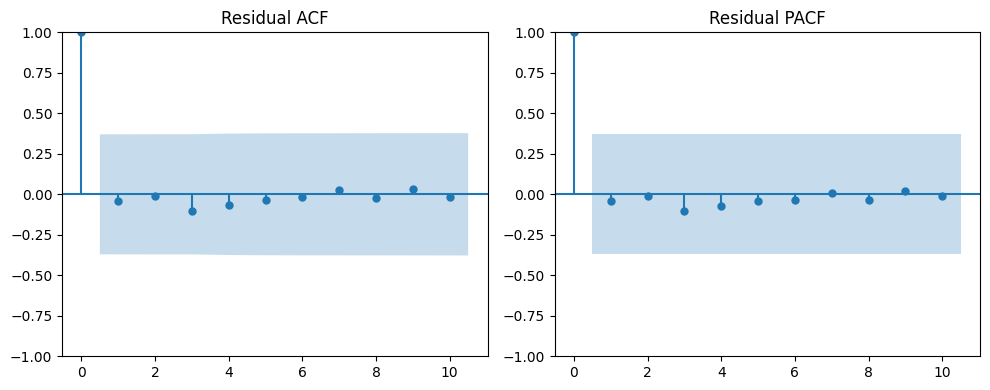

Ljung‑Box (lag=10):
     lb_stat  lb_pvalue
10  0.706852   0.999966


In [27]:
# This code fits an ARIMA(2,1,0) model, checks if its residuals are random (good fit), and forecasts the last 12 months

# Fit ARIMA(2,1,0) on full sample
model = ARIMA(ts_clean, order=(2,1,0)).fit()
print(model.summary())

# Residual diagnostics (ACF/PACF + Ljung‑Box)
resid = model.resid
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sm.graphics.tsa.plot_acf(resid, lags=10, ax=axes[0]); axes[0].set_title("Residual ACF")
sm.graphics.tsa.plot_pacf(resid, lags=10, ax=axes[1]); axes[1].set_title("Residual PACF")
plt.tight_layout(); plt.show()

print("Ljung‑Box (lag=10):")
print(sm.stats.acorr_ljungbox(resid, lags=[10], return_df=True))

# One‑year hold‑out forecast
h = 12
train, test = ts_clean[:-h], ts_clean[-h:]
m_train = ARIMA(train, order=(2,1,0)).fit()
f_test = m_train.forecast(steps=h)

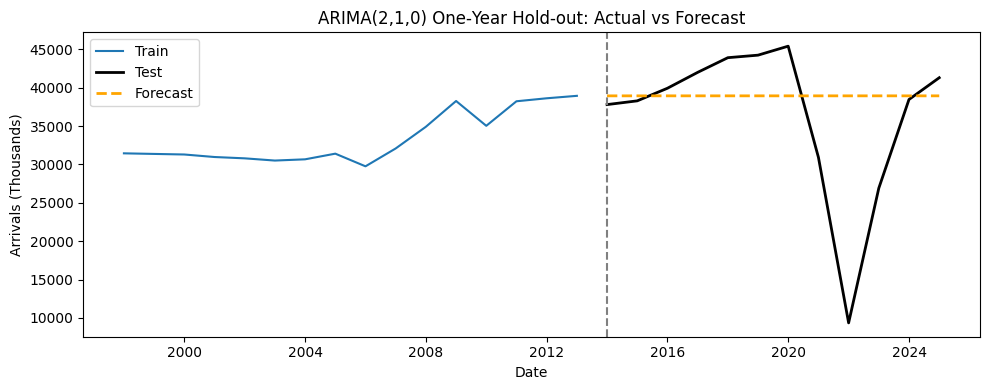

In [28]:
# How well the ARIMA(2,1,0) model's forecast matches the actual values in the one-year hold-out period
# Plot train / test / forecast

plt.figure(figsize=(10,4))
plt.plot(train, label="Train")
plt.plot(test,  label="Test", color="black", linewidth=2)
plt.plot(test.index, f_test, label="Forecast", color="orange", linestyle="--", linewidth=2)
plt.axvline(test.index[0], color="gray", linestyle="--")
plt.title("ARIMA(2,1,0) One‑Year Hold‑out: Actual vs Forecast")
plt.ylabel("Arrivals (Thousands)")
plt.xlabel("Date")
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
# ARIMAX(2,1,0) + Post COVID Dummy

In [30]:
# Fitting an ARIMAX(2,1,0) model with a post-COVID dummy variable

warnings.filterwarnings("ignore")

# build exogenous regressor on the same index
exog = pd.DataFrame({
    "post_covid": (ts_clean.index.year >= 2022).astype(int)
}, index=ts_clean.index)

# fit ARIMAX(2,1,0) with that dummy
m_arimax = SARIMAX(
    ts_clean,
    order=(2,1,0),
    exog=exog,
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

print(m_arimax.summary())

                               SARIMAX Results                                
Dep. Variable:         total_arrivals   No. Observations:                   28
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -246.356
Date:                Fri, 09 May 2025   AIC                            500.712
Time:                        22:04:37   BIC                            505.587
Sample:                    12-31-1997   HQIC                           502.064
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
post_covid  1.756e+04   6014.246      2.920      0.003    5774.900    2.94e+04
ar.L1          0.5780      0.105      5.482      0.000       0.371       0.785
ar.L2         -0.5949      0.377     -1.579      0.1

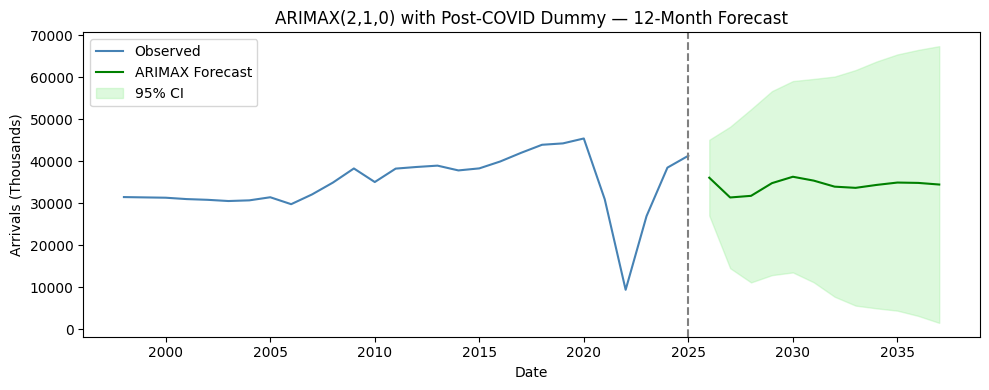

In [31]:
# Forecast next 12 months with dummy=1
n = 12
future_exog = pd.DataFrame({
    "post_covid": [1]*n
}, index=pd.date_range(
    start=ts_clean.index[-1] + pd.offsets.MonthEnd(1),
    periods=n, freq="M"
))

fc = m_arimax.get_forecast(steps=n, exog=future_exog)
mean = fc.predicted_mean
ci = fc.conf_int()

# plot observed vs ARIMAX forecast
plt.figure(figsize=(10,4))
plt.plot(ts_clean, label="Observed", color="steelblue")
plt.plot(mean.index, mean, label="ARIMAX Forecast", color="green")
plt.fill_between(mean.index, ci.iloc[:,0], ci.iloc[:,1],
                 color="lightgreen", alpha=0.3, label="95% CI")
plt.axvline(ts_clean.index[-1], linestyle="--", color="gray")
plt.title("ARIMAX(2,1,0) with Post‑COVID Dummy — 12‑Month Forecast")
plt.ylabel("Arrivals (Thousands)")
plt.xlabel("Date")
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
# Forecasts together for comparison

In [33]:
# define 12‑month hold‑out
h = 12
train, test = ts_clean[:-h], ts_clean[-h:]
hold_start = test.index[0]

# fit ARIMA(2,1,0)
m1 = ARIMA(train, order=(2,1,0)).fit()
f1 = m1.forecast(steps=h)
mape1 = np.mean(np.abs((test - f1)/test)) * 100

# fit SARIMA(0,1,1)(0,1,1,12)
m2 = SARIMAX(
    train,
    order=(0,1,1),
    seasonal_order=(0,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)
f2 = m2.forecast(steps=h)
mape2 = np.mean(np.abs((test - f2)/test)) * 100

# fit ARIMAX(2,1,0)+post‑COVID dummy
exog = pd.DataFrame({"post_covid": (ts_clean.index.year >= 2022).astype(int)}, index=ts_clean.index)
exog_train, exog_test = exog[:-h], exog[-h:]
m3 = SARIMAX(
    train,
    order=(2,1,0),
    exog=exog_train,
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)
f3 = m3.get_forecast(steps=h, exog=exog_test).predicted_mean
mape3 = np.mean(np.abs((test - f3)/test)) * 100

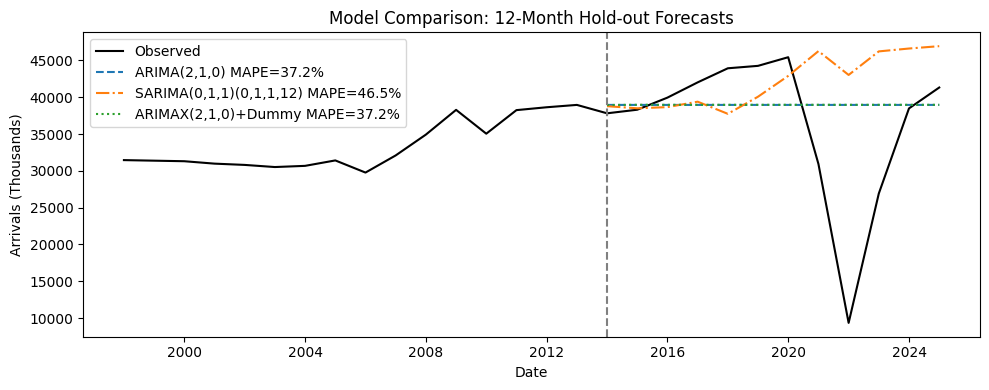

In [34]:
# plot comparison
plt.figure(figsize=(10,4))
plt.plot(ts_clean, 'k', label="Observed")

plt.plot(test.index, f1, '--', color='tab:blue',
         label=f"ARIMA(2,1,0) MAPE={mape1:.1f}%")
plt.plot(test.index, f2, '-.', color='tab:orange',
         label=f"SARIMA(0,1,1)(0,1,1,12) MAPE={mape2:.1f}%")
plt.plot(test.index, f3, ':', color='tab:green',
         label=f"ARIMAX(2,1,0)+Dummy MAPE={mape3:.1f}%")

plt.axvline(hold_start, color='gray', linestyle='--')
plt.title("Model Comparison: 12‑Month Hold‑out Forecasts")
plt.ylabel("Arrivals (Thousands)")
plt.xlabel("Date")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Among the tested models, ARIMA(2,1,0) improved over the basic ARIMA(1,1,1) by better capturing pre-pandemic patterns,
# while ARIMAX(2,1,0) further enhanced short-term accuracy by including a post-COVID dummy that partially accounted for the recovery shif
# The ARIMAX(2,1,0) with the Post-COVID dummy performed best, with the lowest MAPE. This is because it accounts for the structural shift in
# tourism caused by the pandemic, which the other models miss.